In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set the number of cities and generate random city coordinates
num_cities = 10
cities = np.random.rand(num_cities, 2)

In [3]:
cities

array([[0.14518837, 0.19115874],
       [0.62059608, 0.57952014],
       [0.58053075, 0.07904655],
       [0.10549506, 0.61559841],
       [0.07783617, 0.16474992],
       [0.63434781, 0.63168531],
       [0.84987179, 0.29716323],
       [0.96027687, 0.70522758],
       [0.26861781, 0.64305609],
       [0.99229325, 0.47277928]])

Text(0, 0.5, 'Longitude')

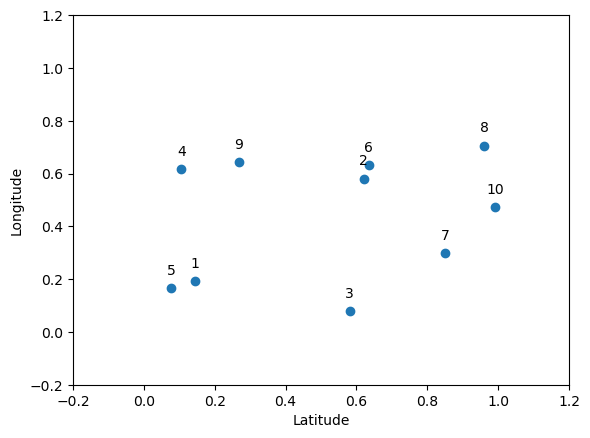

In [4]:
plt.scatter(cities[:,0], cities[:,1])
for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
    plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [5]:
# Calculate the distance matrix between cities
def calculate_distance_matrix(cities):
    num_cities = len(cities)
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            distance_matrix[i, j] = np.linalg.norm(cities[i] - cities[j])
    return distance_matrix

In [6]:
distance_matrix = calculate_distance_matrix(cities)
distance_matrix

array([[0.        , 0.61387056, 0.44954658, 0.42629168, 0.07234462,
        0.65828612, 0.71261186, 0.96365764, 0.46845068, 0.89269077],
       [0.61387056, 0.        , 0.50207473, 0.51636295, 0.68309783,
        0.05394734, 0.36372073, 0.36219526, 0.35766677, 0.38672006],
       [0.44954658, 0.50207473, 0.        , 0.7166218 , 0.50994794,
        0.55525299, 0.34658257, 0.73233175, 0.64451256, 0.56971381],
       [0.42629168, 0.51636295, 0.7166218 , 0.        , 0.45169611,
        0.52909736, 0.80962811, 0.85946805, 0.16541752, 0.89822511],
       [0.07234462, 0.68309783, 0.50994794, 0.45169611, 0.        ,
        0.72645293, 0.78330854, 1.03480321, 0.51495089, 0.9649424 ],
       [0.65828612, 0.05394734, 0.55525299, 0.52909736, 0.72645293,
        0.        , 0.3979392 , 0.33412306, 0.36590672, 0.39163257],
       [0.71261186, 0.36372073, 0.34658257, 0.80962811, 0.78330854,
        0.3979392 , 0.        , 0.42273608, 0.67638603, 0.22610809],
       [0.96365764, 0.36219526, 0.7323317

Text(0, 0.5, 'Longitude')

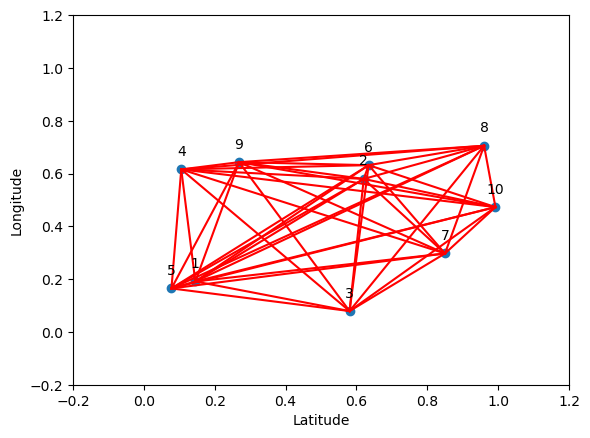

In [7]:
plt.scatter(cities[:,0], cities[:,1])
for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
    plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
for i in range(len(cities)):
    for j in range(i+1, len(cities)):
        plt.plot([cities[i,0], cities[j,0]], [cities[i,1], cities[j,1]], color='red')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [8]:
origin_city = 2
destination_city = 5

In [9]:
def plot_origin_desitination(cities, origin_city, destination_city):
    plt.scatter(cities[:,0], cities[:,1])
    for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
        plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
    if origin_city != destination_city:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
        plt.scatter(cities[destination_city-1,0], cities[destination_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Destination", (cities[destination_city-1,0], cities[destination_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    else:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin/Destination", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")

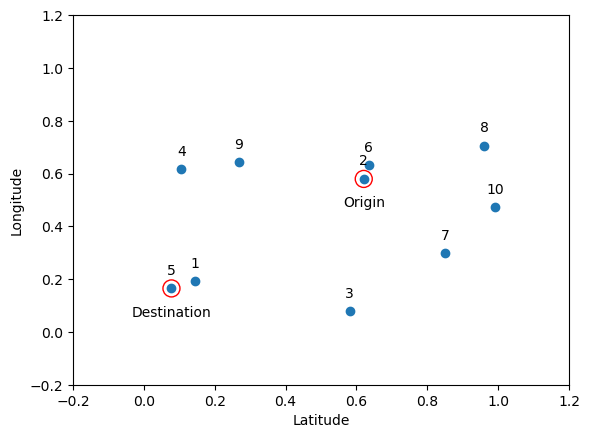

In [10]:
plot_origin_desitination(cities, origin_city, destination_city)

In [11]:
# Define population size and number of generations
population_size = 10
num_generations = 1000

In [12]:
# Initialize the population
def initialize_population(population_size, num_cities, origin_city, destination_city):
    if origin_city != destination_city:
        population = np.zeros((population_size, num_cities), dtype=int)
        rest_cities = list(range(1,num_cities+1))
        rest_cities.remove(origin_city)
        rest_cities.remove(destination_city)
        for i in range(population_size):
            population[i][0] = origin_city
            population[i][-1] = destination_city
            population[i][1:-1] = np.random.permutation(rest_cities)
    else:
        population = np.zeros((population_size, num_cities+1), dtype=int)
        rest_cities = list(range(1,num_cities+1))
        rest_cities.remove(origin_city)
        for i in range(population_size):
            population[i][0] = origin_city
            population[i][-1] = destination_city
            population[i][1:-1] = np.random.permutation(rest_cities)
    return population

In [13]:
population = initialize_population(population_size, num_cities, origin_city, destination_city)
population

array([[ 2,  1,  3,  9,  4,  6,  8, 10,  7,  5],
       [ 2,  9,  4,  1,  8,  6, 10,  7,  3,  5],
       [ 2,  8,  7,  1,  4, 10,  6,  9,  3,  5],
       [ 2, 10,  9,  8,  6,  3,  7,  4,  1,  5],
       [ 2,  4,  8,  7, 10,  3,  1,  9,  6,  5],
       [ 2,  6,  4,  3,  7,  9,  8, 10,  1,  5],
       [ 2,  1,  7,  8, 10,  3,  4,  9,  6,  5],
       [ 2,  1,  9,  3,  6, 10,  4,  8,  7,  5],
       [ 2,  1,  4,  3,  9,  6,  7, 10,  8,  5],
       [ 2,  9,  6, 10,  7,  8,  1,  4,  3,  5]])

In [14]:
path = population[0]
[distance_matrix[path[i]-1,path[i+1]-1] for i in range(len(path)-1)]

[0.6138705573140522,
 0.44954658006778503,
 0.6445125614903086,
 0.16541751603957888,
 0.5290973625086577,
 0.33412306065462655,
 0.23464283854560855,
 0.2261080946417012,
 0.7833085437445727]

In [15]:
# Calculate the fitness (total path length) for each individual
def calculate_fitness(population, distance_matrix):
    fitness = np.zeros(len(population))
    for i in range(len(population)):
        path = population[i]
        fitness[i] = np.sum([distance_matrix[path[i]-1,path[i+1]-1] for i in range(len(path)-1)])
    return fitness

In [16]:
fitness = calculate_fitness(population, distance_matrix)
fitness

array([3.98062712, 3.72142785, 4.73405979, 4.36882894, 4.60474591,
       4.216761  , 4.52797412, 5.63745714, 4.66069667, 4.3805693 ])

In [17]:
# Crossover operation
def crossover(parent1, parent2):
    child = np.zeros(len(parent1), dtype=int)
    child[0] = parent1[0]
    child[-1] = parent1[-1]
    start = np.random.randint(1,len(parent1)-1)
    end = np.random.randint(start, len(parent1)-1)
    child[start:end] = parent1[start:end]
    remaining = [x for x in parent2 if x not in child]
    child[~child.astype(bool)] = remaining
    return child

In [18]:
child = crossover(population[0], population[1])
child

array([ 2,  1,  3,  9,  4,  8,  6, 10,  7,  5])

In [19]:
# Mutation operation
def mutate(parent):
    index1 = np.random.randint(1,len(parent)-1)
    index2 = np.random.randint(1,len(parent)-1)
    child[index1], child[index2] = child[index2], child[index1]
    return child

In [20]:
child = mutate(population[0])
child

array([ 2,  1,  3,  9,  4,  6,  8, 10,  7,  5])

In [21]:
# Select parents from the population and generate children using crossover
def children_by_crossover(population):
    num_children = len(population) // 2
    children = np.zeros((num_children, population.shape[1]), dtype=int)
    for i in range(num_children):
        parent1 = population[np.random.choice(len(population))]
        parent2 = population[np.random.choice(len(population))]
        children[i] = crossover(parent1, parent2)
    return children

In [22]:
children = children_by_crossover(population)
children

array([[ 2,  9,  6, 10,  7,  8,  1,  4,  3,  5],
       [ 2,  8,  7,  1,  4, 10,  6,  9,  3,  5],
       [ 2,  1,  3,  9,  4,  6,  8, 10,  7,  5],
       [ 2, 10,  9,  8,  6,  3,  4,  7,  1,  5],
       [ 2,  4,  8,  7, 10,  3,  1,  9,  6,  5]])

In [23]:
# Main loop
for generation in range(num_generations):
    children1 = children_by_crossover(population)
    num_children2 = len(population)-len(children1)
    children2 = np.zeros((num_children2, population.shape[1]), dtype=int)
    for i in range(num_children2):
        parent = population[np.random.choice(len(population))]
        child = mutate(parent)
        children2[i] = child
    population = np.concatenate((population, children1, children2), axis=0)
    fitness = calculate_fitness(population, distance_matrix)
    sort_indices = np.argsort(fitness)
    population = population[sort_indices]
    fitness = fitness[sort_indices]
    population = population[:population_size]
    fitness = fitness[:population_size]

In [24]:
# Find the best path
best_path = population[np.argmin(fitness)]
best_distance = min(fitness)

In [25]:
# Print the results
print("Best path:", best_path)
print("Shortest path length:", best_distance)

Best path: [ 2  6  8 10  7  3  9  4  1  5]
Shortest path length: 2.503970291695635


In [26]:
# Plot the best path
def plot_best_path(cities, origin_city, destination_city, best_path):
    plt.scatter(cities[:,0], cities[:,1])
    for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
        plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
    if origin_city != destination_city:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
        plt.scatter(cities[destination_city-1,0], cities[destination_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Destination", (cities[destination_city-1,0], cities[destination_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    else:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin/Destination", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    for i in range(len(best_path)-1):
        plt.plot([cities[best_path[i]-1,0], cities[best_path[i+1]-1,0]], [cities[best_path[i]-1,1], cities[best_path[i+1]-1,1]], color='r')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")

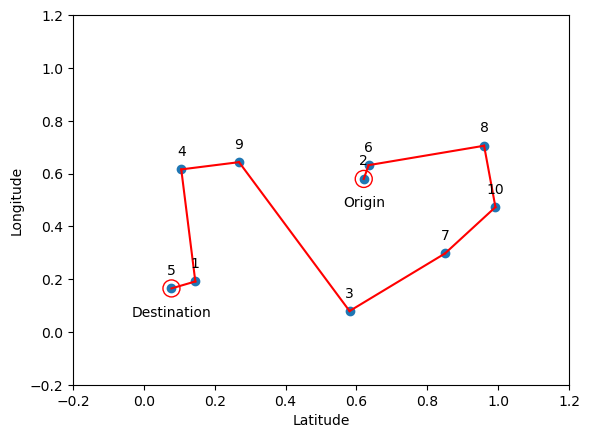

In [27]:
plot_best_path(cities, origin_city, destination_city, best_path)